<a href="https://colab.research.google.com/github/lucyzandile/unsupervised-predict-streamlit-template/blob/master/Movie%20Recommender%20System%20Content-Based%20%26%20Collaborative%20new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Media platforms such as Netflix, ShowMax, Amazon Prime offer a wide variety of content. in recent years the content available through these platforms has increased exponentially. This has presented the users with the problem of spending a lot of time trying to decide what to watch. For these organisations building or acquiring a good recommender system has become a priority as it will help their users find what they liked quickly. Express analytics define a recommender system as a compelling information filtering system running on machine learning (ML) algorithms that can predict a customer’s ratings or preferences for a product. A good recommender engine help to address the challenge of information overload.

### Types of Recommender Systems

Recommender systems can be classified into three categories:
- **Content based filtering** finds similarities between products based on attributes
- **Collaborative filtering** finds out similar users based on user item interactions
- **Hybrids** is a combination of the above mentions recommender systems.

## Problem Statement

Construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

In [ ]:
# Libraries for data loading, data manipulation and data visulisation

import pandas as pd

import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

#Wordcloud
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#others
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display_html 
from IPython.core.display import HTML
from collections import defaultdict
import datetime
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<a id="two"></a>
## Loading the Data

In [ ]:
#Loading the data
df_train = pd.read_csv('C:/Users/Thandazani/Movie Recommender System/train.csv')
df_test = pd.read_csv('C:/Users/Thandazani/Movie Recommender System/test.csv')
df_links = pd.read_csv('C:/Users/Thandazani/Movie Recommender System/links.csv')
df_movies = pd.read_csv('C:/Users/Thandazani/Movie Recommender System/movies.csv')
df_imdb = pd.read_csv('C:/Users/Thandazani/Movie Recommender System/imdb_data.csv')
df_tags = pd.read_csv('C:/Users/Thandazani/Movie Recommender System/tags.csv')
df_genome_tags = pd.read_csv('C:/Users/Thandazani/Movie Recommender System/genome_tags.csv')
df_genome_scores = pd.read_csv('C:/Users/Thandazani/Movie Recommender System/genome_scores.csv')
df_sample_submission = pd.read_csv('C:/Users/Thandazani/Movie Recommender System/sample_submission.csv')

<a id="three"></a>
## Exploratory Data Analysis (EDA)

# EDA(Exploratory Data Analysis)

## Data Description

Here is the data that we are was given to us. Supplied Files

genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
genome_tags.csv - user assigned tags for genome-related scores
imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
sample_submission.csv - Sample of the submission format for the hackathon.
tags.csv - User assigned for the movies within the dataset.
test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.
Description of the data that is given to us

## Viewing Our Data

In [ ]:
#Function to display all data
def data_overview_display(dataframe_list,column_names=[]):
    """
    Displays multiple dataframes in one cell.

    Parameter(s):
    -------------
    dataframe_list(DataFrame(s)): an input of dataframe(s) as list.
    column_names(string): list of string.
    
    Return
    ------
    display_html(DataFrame(s)): returns multiple of dataframes in one cell.
    
    """
    html_string = ''
    html_string += ('<tr>' + ''.join(f'<td style="text-align:center">{name}</td>' for name in column_names) + '</tr>')
    html_string += ('<tr>' + ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>' for df in dataframe_list) + '</tr>')
    html_string = f'<table>{html_string}</table>'
    html_string = html_string.replace('table','table style="display:inline"')
    display_html(html_string, raw=True)

In [ ]:
#Generate the overview
data_overview_display([df_movies.head(),df_genome_tags.head(),df_genome_scores.head()], column_names=['Movies dataframe','genome tags df','genome scores df'])
data_overview_display([df_train.head(),df_test.head(),df_links.head(),df_tags.head()], column_names=['Train df','Test df','Links df','Tags df'])
data_overview_display([df_imdb.head()], column_names=['Imdb df'])

Movies dataframe genome tags df genome scores df 
 
 
 
 movieId 
 title 
 genres 
 
 
 
 
 0 
 1 
 Toy Story (1995) 
 Adventure|Animation|Children|Comedy|Fantasy 
 
 
 1 
 2 
 Jumanji (1995) 
 Adventure|Children|Fantasy 
 
 
 2 
 3 
 Grumpier Old Men (1995) 
 Comedy|Romance 
 
 
 3 
 4 
 Waiting to Exhale (1995) 
 Comedy|Drama|Romance 
 
 
 4 
 5 
 Father of the Bride Part II (1995) 
 Comedy 
 
 
 
 
 
 
 tagId 
 tag 
 
 
 
 
 0 
 1 
 007 
 
 
 1 
 2 
 007 (series) 
 
 
 2 
 3 
 18th century 
 
 
 3 
 4 
 1920s 
 
 
 4 
 5 
 1930s 
 
 
 
 
 
 
 movieId 
 tagId 
 relevance 
 
 
 
 
 0 
 1 
 1 
 0.02875 
 
 
 1 
 1 
 2 
 0.02375 
 
 
 2 
 1 
 3 
 0.06250 
 
 
 3 
 1 
 4 
 0.07575 
 
 
 4 
 1 
 5 
 0.14075

Train df Test df Links df Tags df 
 
 
 
 userId 
 movieId 
 rating 
 timestamp 
 
 
 
 
 0 
 5163 
 57669 
 4.0 
 1518349992 
 
 
 1 
 106343 
 5 
 4.5 
 1206238739 
 
 
 2 
 146790 
 5459 
 5.0 
 1076215539 
 
 
 3 
 106362 
 32296 
 2.0 
 1423042565 
 
 
 4 
 9041 
 366 
 3.0 
 833375837 
 
 
 
 
 
 
 userId 
 movieId 
 
 
 
 
 0 
 1 
 2011 
 
 
 1 
 1 
 4144 
 
 
 2 
 1 
 5767 
 
 
 3 
 1 
 6711 
 
 
 4 
 1 
 7318 
 
 
 
 
 
 
 movieId 
 imdbId 
 tmdbId 
 
 
 
 
 0 
 1 
 114709 
 862.0 
 
 
 1 
 2 
 113497 
 8844.0 
 
 
 2 
 3 
 113228 
 15602.0 
 
 
 3 
 4 
 114885 
 31357.0 
 
 
 4 
 5 
 113041 
 11862.0 
 
 
 
 
 
 
 userId 
 movieId 
 tag 
 timestamp 
 
 
 
 
 0 
 3 
 260 
 classic 
 1439472355 
 
 
 1 
 3 
 260 
 sci-fi 
 1439472256 
 
 
 2 
 4 
 1732 
 dark comedy 
 1573943598 
 
 
 3 
 4 
 1732 
 great dialogue 
 1573943604 
 
 
 4 
 4 
 7569 
 so bad it's good 
 1573943455

Imdb df 
 
 
 
 movieId 
 title_cast 
 director 
 runtime 
 budget 
 plot_keywords 
 
 
 
 
 0 
 1 
 Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste 
 John Lasseter 
 81.0 
 $30,000,000 
 toy|rivalry|cowboy|cgi animation 
 
 
 1 
 2 
 Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup 
 Jonathan Hensleigh 
 104.0 
 $65,000,000 
 board game|adventurer|fight|game 
 
 
 2 
 3 
 Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|Katie Sagona|Ann Morgan Guilbert|James Andelin|Marcus Klemp|Max Wright|Cheryl Hawker|Wayne A. Evenson|Allison Levine 
 Mark Steven Johnson 
 101.0 
 $25,000,000 
 boat|lake|neighbor|rivalry 
 
 
 3 
 4 
 Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Mykelti Williamson|Michael Beach|Leon|Wendell Pierce|Donald Faison|Jeffrey D. Sams|Jazz Raycole|Brandon Hammond|Kenya Moore 
 Terry McMillan 
 124.0 
 $16,000,000 
 black american|husband wife relationship|betrayal|mother son relationship 
 
 
 4 
 5 
 Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony 
 Albert Hackett 
 106.0 
 $30,000,000 
 fatherhood|doberman|dog|mansion

## Checking for duplicates

In [ ]:
#Create the duplicates values dataframes of all the given data
train_duplicates = pd.DataFrame({"Duplicate Values":df_train.duplicated(['userId', 'movieId', 'rating', 'timestamp']).sum()}, index=[0])
train_duplicates = pd.DataFrame({"Duplicate Values":df_test.duplicated(['userId', 'movieId']).sum()}, index=[0])
movies_duplicates = pd.DataFrame({"Duplicate Values":df_movies.duplicated(['movieId', 'title', 'genres']).sum()}, index=[0])
links_duplicates = pd.DataFrame({"Duplicate Values":df_links.duplicated(['movieId', 'imdbId', 'tmdbId']).sum()}, index=[0])
imdb_duplicates = pd.DataFrame({"Duplicate Values":df_imdb.duplicated(['movieId', 'title_cast', 'director', 'runtime', 'budget', 'plot_keywords']).sum()}, index=[0])
tags_duplicates = pd.DataFrame({"Duplicate Values":df_tags.duplicated(['userId', 'movieId', 'tag', 'timestamp']).sum()}, index=[0])
genome_tags_duplicates = pd.DataFrame({"Duplicate Values":df_genome_tags.duplicated(['tagId', 'tag']).sum()}, index=[0])
genome_scores_duplicates = pd.DataFrame({"Duplicate Values":df_genome_scores.duplicated(['movieId', 'tagId', 'relevance']).sum()}, index=[0])

In [ ]:
data_overview_display([train_duplicates, train_duplicates, movies_duplicates, links_duplicates, imdb_duplicates, tags_duplicates, genome_tags_duplicates, genome_scores_duplicates], column_names=['Train df','Test df','Movies df', 'link df', 'genome scores df', 'tags df', 'genome tags df', 'imdb df'])


Train df Test df Movies df link df genome scores df tags df genome tags df imdb df 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0 
 
 
 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0 
 
 
 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0 
 
 
 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0 
 
 
 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0 
 
 
 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0 
 
 
 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0 
 
 
 
 
 
 
 Duplicate Values 
 
 
 
 
 0 
 0

# Checking for null values

In [ ]:
#Create the null values dataframes of all the given data
train_null = pd.DataFrame({"Null Values":df_train.isnull().sum()})
test_null = pd.DataFrame({"Null Values":df_test.isnull().sum()})
movies_null = pd.DataFrame({"Null Values":df_movies.isnull().sum()})
links_null = pd.DataFrame({"Null Values":df_links.isnull().sum()})
imdb_null = pd.DataFrame({"Null Values":df_imdb.isnull().sum()})
tags_null = pd.DataFrame({"Null Values":df_tags.isnull().sum()})
genome_tags_null = pd.DataFrame({"Null Values":df_genome_tags.isnull().sum()})
genome_scores_null = pd.DataFrame({"Null Values":df_genome_scores.isnull().sum()})

In [ ]:
data_overview_display([train_null,test_null,movies_null,links_null,genome_scores_null,tags_null,genome_tags_null, imdb_null], column_names=['Train df','Test df','Movies df', 'link df', 'genome scores df', 'tags df', 'genome tags df', 'imdb df'])


Train df Test df Movies df link df genome scores df tags df genome tags df imdb df 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 rating 
 0 
 
 
 timestamp 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 title 
 0 
 
 
 genres 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 imdbId 
 0 
 
 
 tmdbId 
 107 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 tagId 
 0 
 
 
 relevance 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 tag 
 16 
 
 
 timestamp 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 tagId 
 0 
 
 
 tag 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 title_cast 
 10068 
 
 
 director 
 9874 
 
 
 runtime 
 12089 
 
 
 budget 
 19372 
 
 
 plot_keywords 
 11078

In [ ]:
#Make a copy of the train data
train = df_train.copy()
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


# Normalising and Combining the Data

In [ ]:
#extracting released year
df_movies['release_year']=df_movies['title'].str[-5:-1] 
#spliting the genres into a list
df_movies['genres']=df_movies['genres'].str.split('|') 
#concatinate ratings with movies dataframe
df_movies=pd.concat([df_movies,df_train['rating']],axis=1).dropna() 
df_movies.head()

,movieId,title,genres,release_year,rating
0,1.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,4.0
1,2.0,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,4.5
2,3.0,Grumpier Old Men (1995),"[Comedy, Romance]",1995,5.0
3,4.0,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,2.0
4,5.0,Father of the Bride Part II (1995),[Comedy],1995,3.0


In [ ]:
#spliting the title cast into a list
df_imdb['title_cast']=df_imdb['title_cast'].str.split('|') 
#spliting the Key words into a list
df_imdb['plot_keywords']=df_imdb['plot_keywords'].str.split('|') 
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"


## Latest Popular Movies by ratings (Top 20) from 2000 to date

In [ ]:
#Below is the function that extract porpular movies

def extract_popular_movies(df1,df2):
    """
    Retruns porpular movies from based on avarage ratings and total ratings count.

    Parameters
    ----------
    df1: DataFrame from train_df.
    df2: DataFrame from movies_df.
    
    Return
    ------
    Porpular_movies(DataFrame): returns dataframe of porpular movies.
    
    Example
    -------
    >>> train = pd.read_csv('train.csv')
    >>> movie = pd.read_csv('train.csv')
    
    >>> extract_popular_movies(train, movie).head(2)
    
    -----------------------------------------------
           title| rating|rating_counts|release_year
    -----------------------------------------------
    0 |abc(2001)| 3.2341|        2435 |       2001
    1 |def(2002)| 5.2343|        534  |       2002    
      
    """
    #Calculating the avarage rating and storing the results as a DataFrame
    rating = pd.DataFrame(df1.groupby('movieId')['rating'].mean())
    #Calculating the total ratings count and storing the results as a DataFrame
    rating['ratings_count'] = pd.DataFrame(df1.groupby('movieId')['rating'].count())
    rating=rating.sort_values(by=['ratings_count','ratings_count'],ascending=False).reset_index()
    
    #Joining the Two DataFrames
    inner_join = pd.merge(rating,df2,on ='movieId',how ='inner')
    popular_movies=inner_join[['title','rating_x','ratings_count','release_year']].rename(columns={"rating_x": "rating"})
    
    return popular_movies

In [ ]:
#Create the variable "data"
data=extract_popular_movies(train,df_movies)

#Extracting latest movies from 2000 till to date
latest_movies=data[data['release_year']>'2000'][['rating','ratings_count','title']]

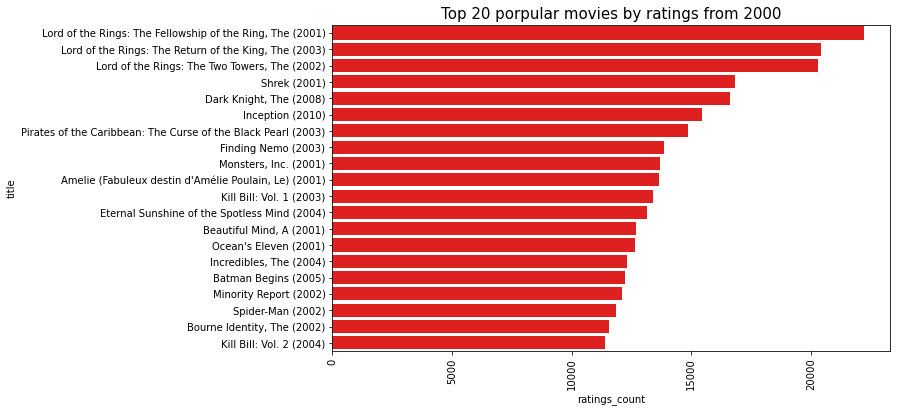

In [ ]:
#Plotting the latest movies from 2000 using bar-plots
plt.figure(figsize = (10,6))
ax=sns.barplot(y='title', x='ratings_count', data=latest_movies.head(20),color='red')
ax.set_title('Top 20 porpular movies by ratings from 2000',fontsize=15)
plt.xticks(rotation=90)
plt.show()

From the above plot, we observe that the based on average rating and the total count of ratings, the movie Lord of the Rings: The Fellowship of the Ring (2001) had the most rating counts of over 21 000 when we considered movies from 2000 till date.

# Popular Cast

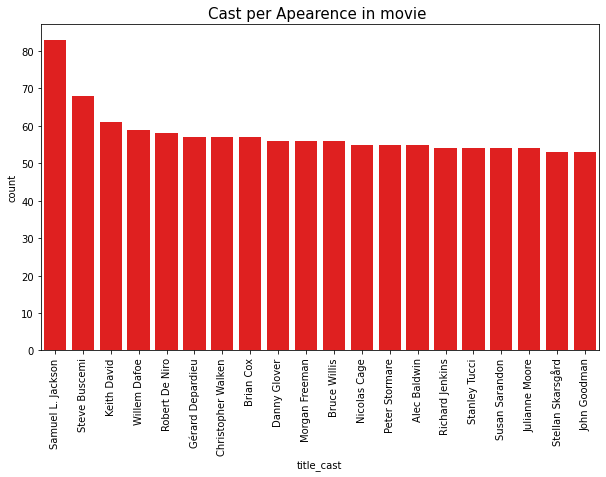

In [ ]:
#Plotting popular cast using count-plot

plt.figure(figsize = (10,6))
title_cast=df_imdb['title_cast'].explode()
ax=sns.countplot(x= title_cast, order = title_cast.value_counts().index[:20],color='red')
ax.set_title('Cast per Apearence in movie ',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Observation: Samuel L Jackson was the popular cast as he appeared in over 80 movies from our database.

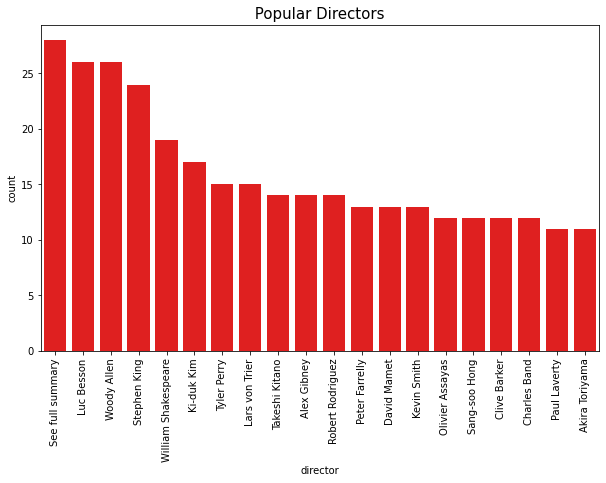

In [ ]:
#Plotting popular cast using count-plot
plt.figure(figsize = (10,6))
director=df_imdb['director'].explode()
ax=sns.countplot(x= director, order = director.value_counts().index[:20],color='red')
ax.set_title(' Popular Directors ',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Observation: Luc Besson was the popular director as he directed over 25 movies from our database.

In [ ]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


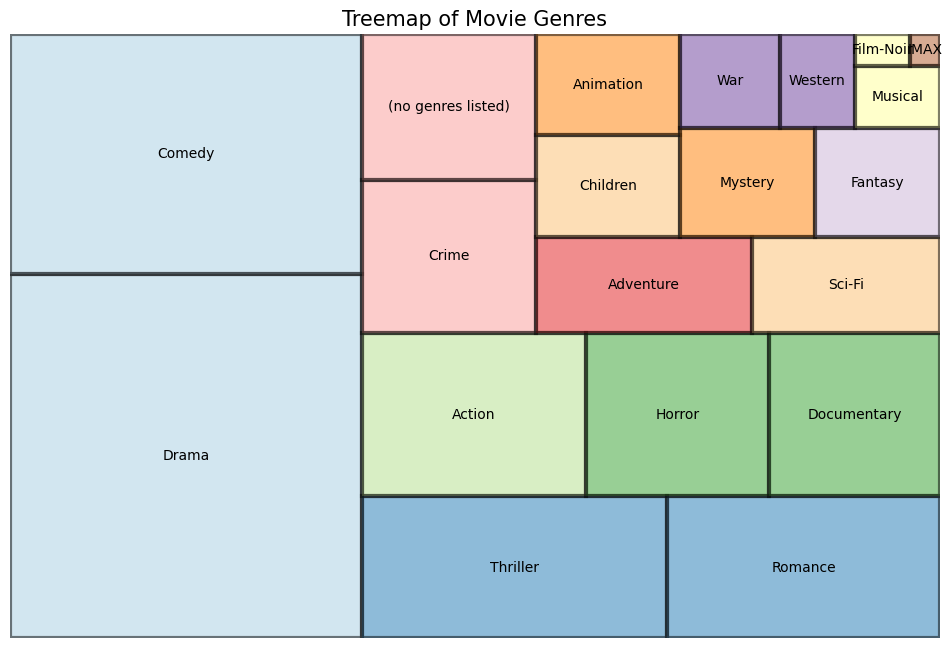

In [ ]:
import squarify
#Create variable "temp_df"
temp_df = df_movies['genres'].explode().value_counts().reset_index()

#Plotting popular genres using Treemap
sizes=np.array(temp_df['genres'])
labels=temp_df['index']
colors = [plt.cm.Paired(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="black", linewidth=3, text_kwargs={'fontsize':10})
plt.title('Treemap of Movie Genres', fontsize = 15)
plt.axis('off')
plt.show()

The top 5 genres are, in that respect order: Drama, Comedy, Action, Thriller, and Romance.

## Average budget per genre

In [ ]:
#Merging the imdb_df and movies_df
movies_imdb_df = pd.merge(df_imdb,df_movies,on ='movieId',how ='inner')

In [ ]:
#Create variable "budget_genre"
budget_genre=movies_imdb_df[['genres','budget']].explode('genres')
budget_genre['budget']=budget_genre['budget'].str.replace(',', "").str.extract('(\d+)', expand=False).astype('float')

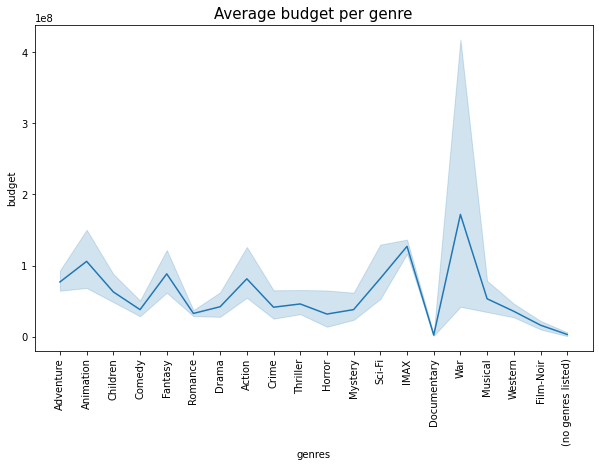

In [ ]:
#Plotting an average budget per genre using line-plot
plt.figure(figsize=(10,6))
ax=sns.lineplot(x="genres", y="budget", palette = ["red"],  data=budget_genre)
ax.set_title('Average budget per genre',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Observation: Movies with the genre War had the biggest budget according to our database

## Data Preprocessing

In [ ]:
df_movies1 = df_movies.copy()

df_imdb1 = df_imdb.copy()

In [ ]:
# Merge the df_merge and df_imdb
df_merge = df_movies1.merge(df_imdb1, on='movieId')

#Checking df_merge dataset head
display(df_merge.head())

#Checking for null values
display(df_merge.isnull().sum())

,movieId,title,genres,release_year,rating,title_cast,director,runtime,budget,plot_keywords
0,1.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,4.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2.0,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,4.5,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3.0,Grumpier Old Men (1995),"[Comedy, Romance]",1995,5.0,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4.0,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,2.0,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5.0,Father of the Bride Part II (1995),[Comedy],1995,3.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"


movieId              0
title                0
genres               0
release_year         0
rating               0
title_cast        9665
director          9519
runtime          11345
budget           17583
plot_keywords    10482
dtype: int64

In [ ]:
df_merge = df_merge[['title','genres', 'title_cast', 'director', 'plot_keywords']]
df_merge.head()

,title,genres,title_cast,director,plot_keywords
0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"[toy, rivalry, cowboy, cgi animation]"
1,Jumanji (1995),"[Adventure, Children, Fantasy]","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,"[board game, adventurer, fight, game]"
2,Grumpier Old Men (1995),"[Comedy, Romance]","[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,"[boat, lake, neighbor, rivalry]"
3,Waiting to Exhale (1995),"[Comedy, Drama, Romance]","[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,"[black american, husband wife relationship, be..."
4,Father of the Bride Part II (1995),[Comedy],"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,"[fatherhood, doberman, dog, mansion]"


In [ ]:
# convert data types to strings for string handling
df_merge['genres'] = df_merge.genres.astype(str)
df_merge['title_cast'] = df_merge.title_cast.astype(str)
df_merge['director'] = df_merge.director.astype(str)
df_merge['plot_keywords'] = df_merge.plot_keywords.astype(str)

# discarding the line between genres and putting the genres in a list of words
df_merge['genres'] = df_merge['genres'].map(lambda x: x.lower().split('|'))

# discarding the liness between the actors full names and getting only the first three names
df_merge['title_cast'] = df_merge['title_cast'].map(lambda x: x.split('|')[:3])

#converting name and surname of directors to lowercase
df_merge['director'] = df_merge['director'].apply(lambda x: "".join(x.lower() for x in x.split()))

# discarding the line between plot_keywords and putting the plot_keywords in a list of words
df_merge['plot_keywords'] = df_merge['plot_keywords'].map(lambda x: x.lower().split('|'))


# merging together first and last name for each title_cast and director, so it's considered as one word 
for index, row in df_merge.iterrows():
    row['title_cast'] = [x.lower().replace(' ','') for x in row['title_cast']]
    row['director'] = ''.join(row['director']).lower()

In [ ]:
df_merge.set_index('title', inplace = True)
df_merge.head()

,genres,title_cast,director,plot_keywords
title,,,,
Toy Story (1995),"[['adventure', 'animation', 'children', 'comed...","[['tomhanks','timallen','donrickles','jimvarne...",johnlasseter,"[['toy', 'rivalry', 'cowboy', 'cgi animation']]"
Jumanji (1995),"[['adventure', 'children', 'fantasy']]","[['robinwilliams','jonathanhyde','kirstendunst...",jonathanhensleigh,"[['board game', 'adventurer', 'fight', 'game']]"
Grumpier Old Men (1995),"[['comedy', 'romance']]","[['waltermatthau','jacklemmon','sophialoren','...",markstevenjohnson,"[['boat', 'lake', 'neighbor', 'rivalry']]"
Waiting to Exhale (1995),"[['comedy', 'drama', 'romance']]","[['whitneyhouston','angelabassett','lorettadev...",terrymcmillan,"[['black american', 'husband wife relationship..."
Father of the Bride Part II (1995),[['comedy']],"[['stevemartin','dianekeaton','martinshort','k...",alberthackett,"[['fatherhood', 'doberman', 'dog', 'mansion']]"


# Build a Movie Recommendation System

### What is a Recommendation System?

Recommendation systems are computer programs that suggest recommendations to users depending on a variety of criteria.

These systems estimate the most likely product that consumers will buy and that they will be interested in. Netflix, Amazon, and other companies use recommender systems to help their users find the right product or movie for them.

In this problem we want to predict the “rating” or “preference” of a user towards a domain-specific item or item. In our case, this domain-specific item is a movie, therefore the main focus of our recommendation system is to filter and predict only those movies which a user would prefer given some data about the user him or herself.

We are going to look both *Content-based Filtering* and *Collaborative filtering* and then do a comparison and conclusion about their perfomance and our preferences

# Content-Based Recommender System

Content based recommender is a recommendation model that returns a list of items based on a specific item. A nice example of this recommenders are Netflix, YouTube, Disney+ and more. For example, Netflix recommends similar shows that you watched before and liked more.

In [ ]:
df_merge['bag_of_words'] = ''
columns = df_merge.columns
for index, row in df_merge.iterrows():
    words = ''
    for col in columns:
        if col != 'director':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
df_merge.drop(columns = [col for col in df_merge.columns if col!= 'bag_of_words'], inplace = True)

In [ ]:
# instantiating and generating the count matrix

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
count_vect_matrix = count_vect.fit_transform(df_merge['bag_of_words'])

In [ ]:
indices = pd.Series(df_merge.index)

In [ ]:
# generating the cosine similarity matrix
sim_score = cosine_similarity(count_vect_matrix, count_vect_matrix)

In [ ]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(title, sim_score = sim_score):
    
    recommended_movies = []
    
    # getting the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(sim_score[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(df_merge.index)[i])
        
    return recommended_movies

### Test the functionality of Content-Based Recommender System

In [ ]:
recommendations('Toy Story (1995)')

['Toy Story 2 (1999)',
 'Toy Story 3 (2010)',
 'Toy Story Toons: Small Fry (2011)',
 'Toy Story Toons: Hawaiian Vacation (2011)',
 "Dug's Special Mission (2009)",
 'Toy Story Toons: Partysaurus Rex (2012)',
 'Toy Story of Terror (2013)',
 'Madame Tutli-Putli (2007)',
 'Gone Nutty (2002)',
 'DuckTales: The Movie - Treasure of the Lost Lamp (1990)']

## Complete content-Based recommender system

In [ ]:
#Make a copy of the train data
train = df_train.copy()
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
train = pd.read_csv("C:/Users/Thandazani/Movie Recommender System/train.csv", usecols=['userId', 'movieId', 'rating','timestamp'],dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})
movies = pd.read_csv("C:/Users/Thandazani/Movie Recommender System/movies.csv", usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})

In [ ]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
ratings_df = train
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
movies_df = movies
movies_df.isnull().sum()

movieId    0
title      0
dtype: int64

In [ ]:
print("Movies:",movies_df.shape)
print("Ratings:",ratings_df.shape)

Movies: (62423, 2)
Ratings: (10000038, 4)


# COLLABORATIVE FILTERING

### Creating kNN Model 

Selecting only 200000 rows from train dataset for ratings

In [ ]:
ratings = train.head(200000)
ratings.shape

(200000, 4)

After creating a new DF where we select only 200000 Dataset, now we creating a Pivot Table with users as indices and movies as columns

For the purpose of parsing data to our model later, we need to create a Pivot Table. For this, we set 'MovieId' as the index, our columns will be 'userId' and the values in our table will be 'rating'

In [ ]:
data = ratings.pivot_table(index = 'movieId',columns = 'userId',values ='rating').fillna(0)
data.head()

userId,1,2,3,4,8,9,12,13,15,18,...,162522,162524,162529,162533,162534,162535,162536,162537,162538,162541
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

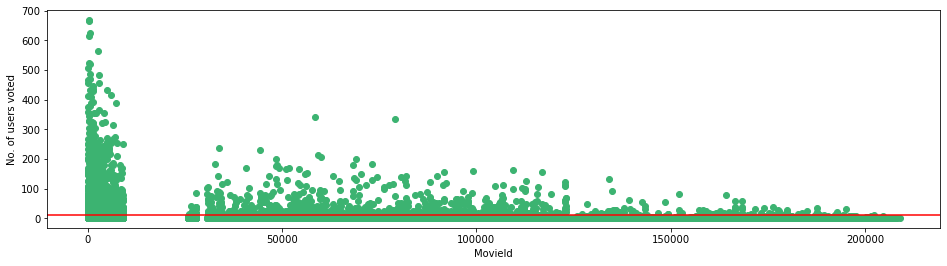

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [ ]:
final_dataset =data.loc[no_user_voted[no_user_voted > 10].index,:]

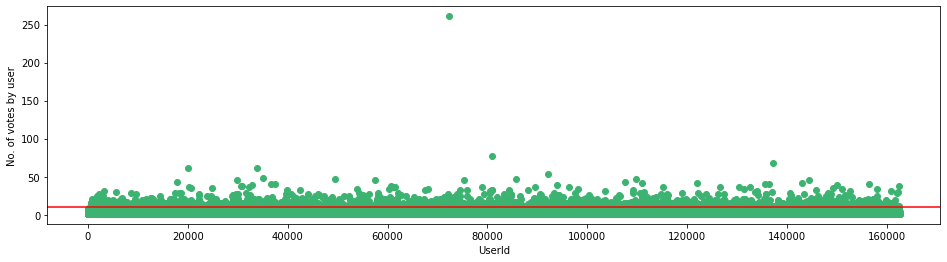

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [ ]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 10].index]
final_dataset

userId,548,606,626,653,757,803,847,997,1228,1477,...,161091,161342,161383,161544,161586,161826,162047,162271,162445,162516
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Our final_dataset has dimensions of 3234 rows × 1674 columns where most of the values are sparse. We took only small dataset but for original large dataset of movie lens which has more than 1000000 features, this will sure hang our system when this has feed to model. To reduce the sparsity we use csr_matric scipy lib.

In [ ]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


Creating a kNN model to print 10 movies recommendations similar to each other
We use the csr_matrix from scipy.sparse to convert our pivot table into a matrix of arrays that we will use to fit our model.

In [ ]:
from scipy.sparse import csr_matrix

csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [ ]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

We use cosine distance metric which is very fast and preferable than pearson coefficient.

Finally, we fit the NearestNeighbors from sklearn.neighbors to our previously generated matrix data. We set the metric to 'cosine' and algorithm 'brute'.

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

### Test the functionality of Collaborative Filtering Recommender System

In [ ]:
get_movie_recommendation('Captain Phillips (2013)')

'No movies found. Please check your input'

In [ ]:
get_movie_recommendation('Breaking Away')

,Title,Distance
1,Lincoln (2012),0.728886
2,Three Colors: Red (Trois couleurs: Rouge) (1994),0.719098
3,¡Three Amigos! (1986),0.717914
4,"Madness of King George, The (1994)",0.700062
5,"Walk to Remember, A (2002)",0.665748
6,Jane Eyre (1996),0.631477
7,Mr. Holland's Opus (1995),0.603373
8,Children of the Corn (1984),0.603360
9,Winter's Bone (2010),0.595958
10,Chocolat (1988),0.571389


In [ ]:
get_movie_recommendation('Invisible Man, The')

,Title,Distance
1,Sleeping with the Enemy (1991),0.724260
2,Father of the Bride (1991),0.717816
3,Gosford Park (2001),0.713935
4,Wild Strawberries (Smultronstället) (1957),0.708270
5,Perfect Blue (1997),0.696263
6,Captain Phillips (2013),0.684193
7,Key Largo (1948),0.675633
8,Talk to Her (Hable con Ella) (2002),0.562405
9,Koyaanisqatsi (a.k.a. Koyaanisqatsi: Life Out ...,0.544394
10,"Avengers, The (1998)",0.504132
